In [1]:
# Data set comes from kaggle's "Predict Diabetes - Analyze Diabetes Database" 
# Code largely obtained from a tensorflow tutorial
# Import libraries
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg

In [2]:
# Load data, but skip the header
dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)

In [3]:
# The first 8 columns are the features and the last column is the label
# I'm going to save the first 10 datums for validating the model
X_training = dataset[10:, 0:8]
y_training = dataset[10:, 8]

In [4]:
# Define the network
neural_network = Sequential()
neural_network.add(Dense(12, input_shape=(8,), activation='relu'))
neural_network.add(Dense(8, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid'))

2024-01-23 09:43:40.834912: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Add some other parameters to the network
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train the network
history = neural_network.fit(X_training, y_training, epochs=150, batch_size=10)

2024-01-23 09:43:51.641135: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
76/76 [==============================] - 0s 650us/step - loss: 2.8790 - accuracy: 0.5290
Epoch 2/150
76/76 [==============================] - 0s 610us/step - loss: 1.6971 - accuracy: 0.5620
Epoch 3/150
76/76 [==============================] - 0s 628us/step - loss: 1.2494 - accuracy: 0.5950
Epoch 4/150
76/76 [==============================] - 0s 649us/step - loss: 1.0216 - accuracy: 0.6280
Epoch 5/150
76/76 [==============================] - 0s 635us/step - loss: 0.9760 - accuracy: 0.6253
Epoch 6/150
76/76 [==============================] - 0s 614us/step - loss: 0.8530 - accuracy: 0.6266
Epoch 7/150
76/76 [==============================] - 0s 607us/step - loss: 0.8219 - accuracy: 0.6148
Epoch 8/150
76/76 [==============================] - 0s 635us/step - loss: 0.7686 - accuracy: 0.6478
Epoch 9/150
76/76 [==============================] - 0s 610us/step - loss: 0.7580 - accuracy: 0.6385
Epoch 10/150
76/76 [==============================] - 0s 609us/step - loss: 0.7529 - accura

Text(0.5, 0, 'epoch')

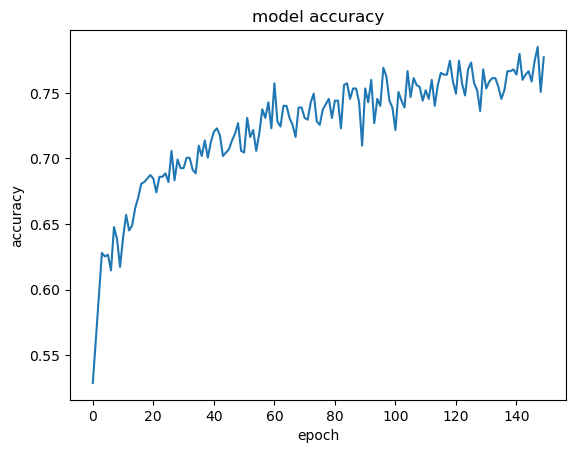

In [7]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [8]:
# Test it out
X_validate = dataset[:10,:8]
y_validate = dataset[:10,8]
# make class predictions with the model
predictions = (neural_network.predict(X_validate) > 0.5).astype(int)
# List out the results from our 10 saved datums
for i in range(10):
 print('%s => %d (expected %d)' % (X_validate[i].tolist(), predictions[i], y_validate[i]))
 

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


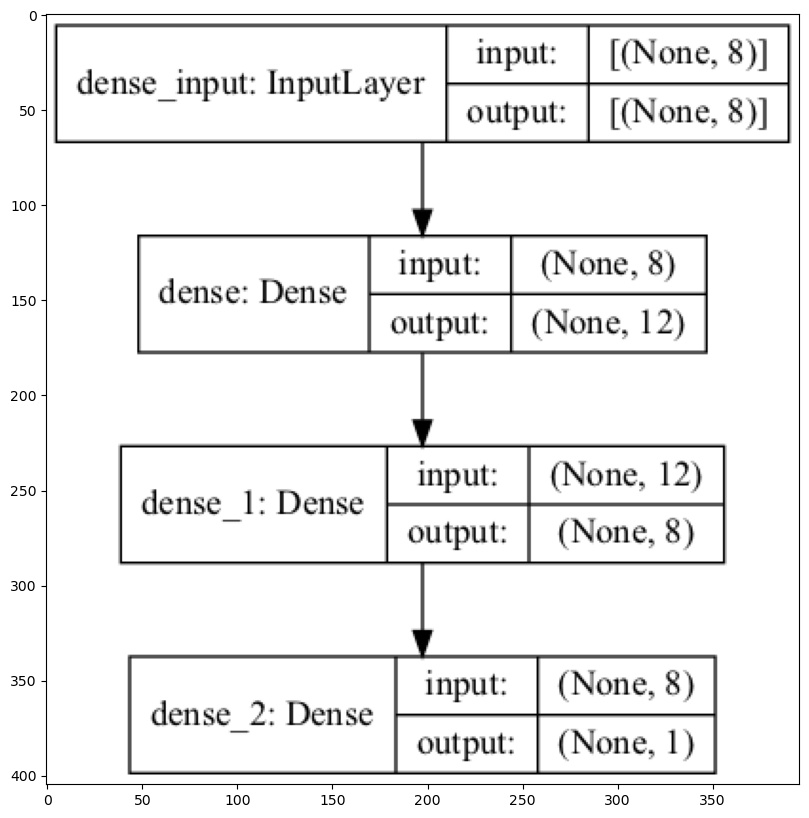

In [12]:
# Plot the model and save the plot to a file

plot_model(neural_network, to_file='model.png', show_shapes=True, show_layer_names=True)

# Load the image file
img = mpimg.imread('model.png')

# Display the image
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()
